In [1]:
import torch
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

cuda


In [2]:
torch.cuda.is_available()

True

In [3]:
import torchvision

In [4]:
torchvision.models

<module 'torchvision.models' from 'C:\\Users\\John\\anaconda3\\envs\\ml10707proj\\lib\\site-packages\\torchvision\\models\\__init__.py'>

In [5]:
import numpy as np

In [6]:
mit_train = np.genfromtxt("Data/kaggle/mitbih_train.csv",delimiter=",")

In [7]:
mit_train.shape #should be 87554,188 7*26+6

(87554, 188)

In [8]:
mit_train_x_complete = mit_train[:,:-1]
mit_train_y_complete = mit_train[:,-1]

In [9]:
np.random.seed(6)
train_samp = np.random.choice(mit_train_x_complete.shape[0],replace=False,size=80000)
mit_train_x = mit_train_x_complete[train_samp]
mit_train_y = mit_train_y_complete[train_samp]

mit_val_x = mit_train_x_complete[np.setdiff1d(np.arange(mit_train_x_complete.shape[0]),train_samp)]
mit_val_y = mit_train_y_complete[np.setdiff1d(np.arange(mit_train_x_complete.shape[0]),train_samp)]

In [10]:
mit_train_x.shape,mit_train_y.shape,mit_val_x.shape,mit_val_y.shape

((80000, 187), (80000,), (7554, 187), (7554,))

In [11]:
from collections import Counter
Counter(mit_train_y)

Counter({0.0: 66214, 4.0: 5850, 1.0: 2033, 2.0: 5322, 3.0: 581})

In [12]:
import matplotlib.pyplot as plt

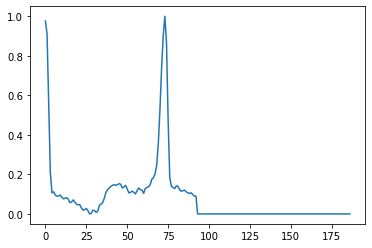

In [13]:
plt.plot(np.arange(mit_train_x.shape[1]),mit_train_x[0])

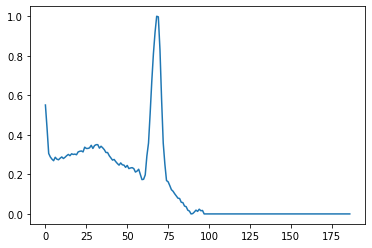

In [14]:
plt.plot(np.arange(mit_train_x.shape[1]),mit_train_x[1])

In [15]:
mit_train_x.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
mit_train_x.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
import pyts
import pyts.image

In [18]:
gaftransformer = pyts.image.GramianAngularField()
mtftransformer = pyts.image.MarkovTransitionField(n_bins=5)

In [19]:
trans1 = gaftransformer.fit_transform([mit_train_x[0]])

In [20]:
trans1.shape

(1, 187, 187)

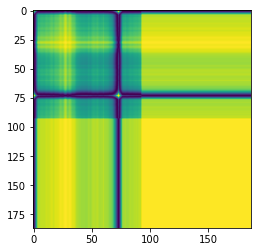

In [21]:
plt.imshow(trans1[0])

In [22]:
trans1_10 = gaftransformer.fit_transform(mit_train_x[:10])

In [23]:
trans1_10.shape

(10, 187, 187)

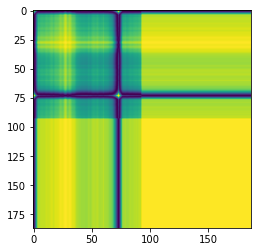

In [24]:
plt.imshow(trans1_10[0])

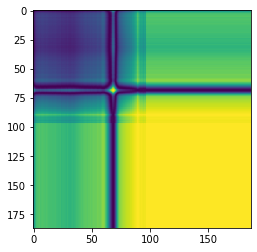

In [25]:
plt.imshow(trans1_10[1])

In [26]:
np.allclose(trans1[0],trans1_10[0])

True

In [27]:
mit_train_x_ims = gaftransformer.fit_transform(mit_train_x)
#mit_train_x_ims = mtftransformer.transform(mit_train_x)

In [28]:
mit_val_x_ims = gaftransformer.fit_transform(mit_val_x)
#mit_val_x_ims = mtftransformer.fit_transform(mit_val_x)

In [25]:
np.random.seed(8)
try_samp = np.random.choice(mit_train_x.shape[0],replace=False,size=5000)
try_samp2 = np.random.choice(np.setdiff1d(np.arange(mit_train_x.shape[0]),try_samp),replace=False,size=1000)

In [26]:
mit_train_x_ims_try = gaftransformer.fit_transform(mit_train_x[try_samp])
mit_train_y_try = mit_train_y[try_samp]

mit_train_x_test = gaftransformer.fit_transform(mit_train_x[try_samp2])
mit_train_y_test = mit_train_y[try_samp2]

In [27]:
Counter(mit_train_y_try)

Counter({0.0: 4158, 4.0: 388, 2.0: 287, 1.0: 120, 3.0: 47})

In [29]:
efficientnet_b2 = torchvision.models.efficientnet_b2()


In [30]:
efficientnet_b2_2 = torchvision.models.efficientnet_b2(pretrained=True)
efficientnet_b2_3 = torchvision.models.efficientnet_b2(pretrained=True)


Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-bcdf34b7.pth" to /home/john/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-bcdf34b7.pth


In [56]:
efficientnet_b2_2.features[0][0].weight

Parameter containing:
tensor([[[[ 4.5455e-02,  7.6288e-02,  3.0048e-02],
          [ 5.5432e-01,  2.9662e-01, -3.1593e-02],
          [ 7.8309e-01,  2.3778e-01, -7.0381e-02]],

         [[-2.9542e-01, -2.2617e-01,  4.4444e-02],
          [-1.1007e+00, -7.1409e-01, -5.0454e-02],
          [-1.4469e+00, -6.2652e-01, -6.3332e-03]],

         [[ 2.2284e-01,  1.2584e-01, -2.9721e-02],
          [ 6.2338e-01,  4.4390e-01,  4.5707e-02],
          [ 6.7145e-01,  4.5727e-01,  7.3647e-03]]],


        [[[-3.9284e-02, -2.5299e-02,  1.4641e-02],
          [ 5.2415e-02, -2.0318e-01,  1.3882e-01],
          [ 9.2027e-02, -9.3667e-01,  9.1768e-01]],

         [[-7.7375e-02, -2.6244e-02,  4.9299e-02],
          [ 2.1007e-01, -6.1103e-01,  4.3788e-01],
          [ 6.8553e-02, -1.9628e+00,  1.9089e+00]],

         [[-5.9978e-02,  1.4608e-02,  1.5315e-03],
          [ 1.6183e-01, -1.6718e-01,  9.2858e-02],
          [-6.7604e-03, -4.1440e-01,  3.6333e-01]]],


        [[[-5.7562e-03, -2.1970e-02, -1.4113

In [57]:
efficientnet_b2_3.features[0][0].weight

Parameter containing:
tensor([[[[ 4.5455e-02,  7.6288e-02,  3.0048e-02],
          [ 5.5432e-01,  2.9662e-01, -3.1593e-02],
          [ 7.8309e-01,  2.3778e-01, -7.0381e-02]],

         [[-2.9542e-01, -2.2617e-01,  4.4444e-02],
          [-1.1007e+00, -7.1409e-01, -5.0454e-02],
          [-1.4469e+00, -6.2652e-01, -6.3332e-03]],

         [[ 2.2284e-01,  1.2584e-01, -2.9721e-02],
          [ 6.2338e-01,  4.4390e-01,  4.5707e-02],
          [ 6.7145e-01,  4.5727e-01,  7.3647e-03]]],


        [[[-3.9284e-02, -2.5299e-02,  1.4641e-02],
          [ 5.2415e-02, -2.0318e-01,  1.3882e-01],
          [ 9.2027e-02, -9.3667e-01,  9.1768e-01]],

         [[-7.7375e-02, -2.6244e-02,  4.9299e-02],
          [ 2.1007e-01, -6.1103e-01,  4.3788e-01],
          [ 6.8553e-02, -1.9628e+00,  1.9089e+00]],

         [[-5.9978e-02,  1.4608e-02,  1.5315e-03],
          [ 1.6183e-01, -1.6718e-01,  9.2858e-02],
          [-6.7604e-03, -4.1440e-01,  3.6333e-01]]],


        [[[-5.7562e-03, -2.1970e-02, -1.4113

In [27]:
efficientnet_b2

EfficientNet(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): ConvNormActivation(
 

In [28]:
replace_w1 = torch.nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

In [29]:
efficientnet_b2.features

Sequential(
  (0): ConvNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (1): Sequential(
    (0): MBConv(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (activation): SiLU(inplace=True)
          (scale_activation): Sigmoid()
        )
        (2): ConvNormActivation(
          (0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=F

In [30]:
efficientnet_b2.features[0]

ConvNormActivation(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): SiLU(inplace=True)
)

In [31]:
efficientnet_b2.features[0][0]

Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

In [32]:
efficientnet_b2.features[0][0].__dir__()

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_conv_forward',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_reversed_padding_repeated_twice',
 '_save_to_state_dict',
 '_sl

In [33]:
efficientnet_b2.features[0][0].weight

Parameter containing:
tensor([[[[ 6.1672e-03, -4.0346e-02,  5.2185e-02],
          [ 6.0527e-02, -5.7140e-02, -2.3929e-02],
          [ 9.4913e-02,  4.6150e-02,  1.5089e-02]],

         [[ 1.9656e-02, -1.2332e-01,  9.4948e-02],
          [-1.1030e-01,  2.9495e-02, -2.8500e-02],
          [ 1.2329e-01,  1.5252e-01,  1.5829e-01]],

         [[-2.0169e-02,  5.1398e-02, -8.2236e-02],
          [ 2.5886e-02, -1.5757e-01, -1.8021e-01],
          [ 7.2297e-02,  1.2766e-01,  9.0751e-02]]],


        [[[ 7.0675e-02, -2.3334e-02, -8.0036e-02],
          [-2.5121e-01, -2.1746e-02,  2.5008e-02],
          [-1.5127e-02, -1.0798e-01,  4.7689e-02]],

         [[-9.2125e-04,  4.2680e-02, -4.8680e-02],
          [-1.1922e-01,  6.4653e-02, -6.4257e-02],
          [-2.3509e-01, -3.9835e-02, -1.5604e-02]],

         [[-6.4507e-02, -1.9241e-01, -9.7056e-02],
          [ 1.0155e-01, -2.7669e-02, -1.1025e-01],
          [ 4.1791e-02,  2.5879e-02, -1.1561e-01]]],


        [[[-4.8486e-02, -7.2743e-02,  4.1630

In [34]:
efficientnet_b2.features[0][0].weight.shape

torch.Size([32, 3, 3, 3])

In [35]:
efficientnet_b2.features[0][0].weight.detach().numpy().shape

(32, 3, 3, 3)

In [36]:
efficientnet_b2.features[0][0].bias

In [37]:
replace_w1.weight.shape

torch.Size([32, 1, 3, 3])

In [38]:
replace_w1.weight

Parameter containing:
tensor([[[[ 0.0615, -0.0537, -0.0466],
          [-0.0247,  0.0465, -0.1781],
          [ 0.2810, -0.0835, -0.1641]]],


        [[[ 0.1424, -0.1157, -0.0558],
          [-0.0145, -0.1420,  0.1542],
          [-0.2403, -0.2228,  0.2960]]],


        [[[-0.2917,  0.0035,  0.2290],
          [-0.1027, -0.0439,  0.2290],
          [ 0.2296, -0.3333, -0.1390]]],


        [[[ 0.2919, -0.0461,  0.3322],
          [ 0.2258, -0.1242,  0.1748],
          [-0.2849, -0.0419, -0.3136]]],


        [[[-0.1182,  0.0855, -0.1332],
          [-0.2125,  0.1873, -0.1740],
          [ 0.0627, -0.2435, -0.0882]]],


        [[[-0.1536, -0.1660,  0.0065],
          [ 0.0087,  0.1616,  0.0227],
          [ 0.0982,  0.1337, -0.2575]]],


        [[[-0.0559,  0.2469,  0.0044],
          [ 0.1068, -0.1701, -0.0903],
          [-0.2588, -0.2869,  0.2261]]],


        [[[ 0.2443, -0.0101, -0.1579],
          [ 0.3205,  0.0143, -0.0734],
          [-0.2044,  0.0720,  0.2064]]],


        [[

In [39]:
replace_w1.weight.__dir__()

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '

In [41]:
eff_w1_3filt = efficientnet_b2.features[0][0]

In [42]:
eff_w1_summed = eff_w1_3filt.weight.detach().numpy().sum(axis=1)
eff_w1_summed.shape

(32, 3, 3)

In [43]:
eff_w1_summed

array([[[ 5.65476343e-03, -1.12271488e-01,  6.48978949e-02],
        [-2.38831677e-02, -1.85218126e-01, -2.32642844e-01],
        [ 2.90502012e-01,  3.26332033e-01,  2.64128149e-01]],

       [[ 5.24765998e-03, -1.73063427e-01, -2.25773171e-01],
        [-2.68877029e-01,  1.52380783e-02, -1.49500623e-01],
        [-2.08426178e-01, -1.21940762e-01, -8.35250840e-02]],

       [[-1.63049474e-01, -1.47412598e-01,  4.16045636e-03],
        [-1.78654969e-01, -5.69806807e-02, -9.89911258e-02],
        [-3.81579310e-01,  3.73084210e-02,  2.18664229e-01]],

       [[-2.25917503e-01,  1.37775764e-01, -3.72130454e-01],
        [-3.30269456e-01,  9.89804566e-02,  6.05632402e-02],
        [ 1.71805725e-01,  2.87561230e-02, -5.79947978e-02]],

       [[-1.64407164e-01, -9.47486013e-02, -5.06752208e-02],
        [ 1.33232772e-03, -1.58334598e-01, -2.37912238e-01],
        [-7.69642442e-02,  1.55851707e-01,  1.30250350e-01]],

       [[-8.85201395e-02, -5.63997366e-02, -3.08958441e-03],
        [ 7.91

In [44]:
eff_w1_summed = eff_w1_summed.reshape((32,1,3,3))

In [46]:
replace_w1.weight = torch.nn.Parameter(torch.tensor(eff_w1_summed))

In [47]:
replace_w1.weight

Parameter containing:
tensor([[[[ 5.6548e-03, -1.1227e-01,  6.4898e-02],
          [-2.3883e-02, -1.8522e-01, -2.3264e-01],
          [ 2.9050e-01,  3.2633e-01,  2.6413e-01]]],


        [[[ 5.2477e-03, -1.7306e-01, -2.2577e-01],
          [-2.6888e-01,  1.5238e-02, -1.4950e-01],
          [-2.0843e-01, -1.2194e-01, -8.3525e-02]]],


        [[[-1.6305e-01, -1.4741e-01,  4.1605e-03],
          [-1.7865e-01, -5.6981e-02, -9.8991e-02],
          [-3.8158e-01,  3.7308e-02,  2.1866e-01]]],


        [[[-2.2592e-01,  1.3778e-01, -3.7213e-01],
          [-3.3027e-01,  9.8980e-02,  6.0563e-02],
          [ 1.7181e-01,  2.8756e-02, -5.7995e-02]]],


        [[[-1.6441e-01, -9.4749e-02, -5.0675e-02],
          [ 1.3323e-03, -1.5833e-01, -2.3791e-01],
          [-7.6964e-02,  1.5585e-01,  1.3025e-01]]],


        [[[-8.8520e-02, -5.6400e-02, -3.0896e-03],
          [ 7.9161e-03, -8.8583e-02, -3.1096e-01],
          [ 1.0341e-01, -2.1811e-02,  1.2231e-01]]],


        [[[-5.5648e-02, -2.0797e-01,

In [48]:
efficientnet_b2.features[0][0] = replace_w1

In [93]:
efficientnet_b2(torch.tensor(mit_train_x_ims_try[:10][:,np.newaxis,:,:].astype(np.float32)))

tensor([[ 0.2175, -0.3077, -0.3479,  ..., -0.0277, -0.0338, -0.5428],
        [-0.0759,  0.1436, -0.0688,  ...,  0.0072, -0.0605,  0.0826],
        [-0.0910,  0.0133,  0.0941,  ..., -0.0172, -0.0575,  0.1283],
        ...,
        [-0.1029, -0.0997, -0.1490,  ...,  0.0033, -0.0185,  0.1192],
        [ 0.0550, -0.0164, -0.0291,  ...,  0.0238,  0.0876,  0.0421],
        [ 0.0172,  0.1080, -0.0502,  ...,  0.0259, -0.1375,  0.1516]],
       grad_fn=<AddmmBackward0>)

In [75]:
efficientnet_b2(torch.tensor(mit_train_x_ims_try[:10][:,np.newaxis,:,:].astype(np.float32)))

tensor([[ 0.1560,  0.1285,  0.0634,  ..., -0.0536, -0.0613,  0.1545],
        [ 0.1051,  0.0723,  0.0930,  ...,  0.0665,  0.1560,  0.0930],
        [ 0.0796, -0.0356, -0.0873,  ..., -0.0084, -0.0303,  0.0722],
        ...,
        [ 0.2359,  0.0269,  0.0226,  ..., -0.1524, -0.0278, -0.0023],
        [ 1.4316,  0.0830,  0.1379,  ..., -0.5529,  0.4594,  0.4878],
        [ 0.0886,  0.1926,  0.0405,  ...,  0.0340,  0.1898,  0.1965]],
       grad_fn=<AddmmBackward0>)

In [76]:
efficientnet_b2(torch.tensor(mit_train_x_ims_try[:10][:,np.newaxis,:,:].astype(np.float32))).shape

torch.Size([10, 1000])

In [84]:
efficientnet_b2(torch.randn(5,1,187,187))

tensor([[ 0.1772,  0.1209, -0.0273,  ...,  0.2825,  0.2800,  0.3685],
        [ 0.1105,  0.0788, -0.0377,  ..., -0.0034, -0.0530,  0.0091],
        [ 0.0831,  0.1188, -0.1801,  ...,  0.1031, -0.1485, -0.0471],
        [ 0.5326,  0.3849,  0.1610,  ...,  0.0548,  0.0137,  0.0774],
        [ 0.1714,  0.0553,  0.0257,  ..., -0.0219,  0.0258,  0.1898]],
       grad_fn=<AddmmBackward0>)

In [29]:
class eff_back(torch.nn.Module):
    def __init__(self,num_classes):
        super(eff_back, self).__init__()
        self.num_classes = num_classes
        backbone = torchvision.models.efficientnet_b2()
        self.backbone = backbone
        
        eff_w1_3filt = self.backbone.features[0][0]
        eff_w1_summed = eff_w1_3filt.weight.detach().numpy().sum(axis=1)
        eff_w1_summed = eff_w1_summed.reshape((32,1,3,3))
        replace_w1 = torch.nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        #replace_w1.weight = torch.tensor(eff_w1_summed)
        replace_w1.load_state_dict({'weight':torch.tensor(eff_w1_summed)})
        self.backbone.features[0][0] = replace_w1

        self.classifier = torch.nn.Linear(in_features=1000, out_features=num_classes, bias=True)
    
    def forward(self,x):
        out_1000 = self.backbone(x)
        return self.classifier(out_1000)

In [30]:
eff_model = eff_back(5)

In [31]:
eff_model.backbone(torch.randn(5,1,187,187))

tensor([[ 1.0695, -0.6848,  0.8272,  ...,  0.0446,  0.5079, -1.4220],
        [-0.6411, -1.9489, -1.5704,  ...,  0.0890,  1.6234, -0.9699],
        [-1.9601, -0.0302,  0.2935,  ..., -1.4343, -2.2644, -0.4214],
        [-1.2045, -0.3208, -1.1385,  ..., -1.4037, -1.3862, -0.0593],
        [-2.3702, -1.4064, -0.1412,  ..., -1.1034, -3.0565,  0.7341]],
       grad_fn=<AddmmBackward0>)

In [31]:
train_label_freqs = Counter(mit_train_y)
loss_weights = np.array([1.0/train_label_freqs[i] for i in range(5)])
loss_weights = (loss_weights/np.sum(loss_weights)).astype(np.float32)
loss_weights

array([0.00583787, 0.19013707, 0.07263222, 0.66531616, 0.0660767 ],
      dtype=float32)

In [32]:
eff_model.to(device)
#ce_loss = torch.nn.CrossEntropyLoss(torch.tensor([1,10.0,10.0,10,10]).to(device))
#ce_loss = torch.nn.CrossEntropyLoss()
ce_loss = torch.nn.CrossEntropyLoss(torch.tensor(loss_weights).to(device))
my_opt = torch.optim.Adam(eff_model.parameters())
batch_size = 64
num_epochs = 10
for epoch_index in range(num_epochs):
    train_loss_sum = 0
    train_loss_weight = 0
    for batch_index in range(0,mit_train_x_ims.shape[0],batch_size):
        my_opt.zero_grad()
        input_batch = torch.tensor(mit_train_x_ims[batch_index:batch_index+batch_size][:,np.newaxis,:,:].astype(np.float32)).to(device)
        pred = eff_model(input_batch)
        target = torch.tensor(mit_train_y[batch_index:batch_index+batch_size].astype(np.int64)).to(device)
        batch_loss = ce_loss(pred,target)
        batch_loss.backward()
        my_opt.step()
        if batch_index//batch_size % 10 == 0:
            print("\tbatch {} loss {}".format(batch_index//batch_size,batch_loss))
        train_loss_sum += batch_loss.detach().cpu().numpy() * mit_train_x_ims[batch_index:batch_index+batch_size].shape[0]
        train_loss_weight += mit_train_x_ims[batch_index:batch_index+batch_size].shape[0]
    print("epoch {} average_loss {}".format(epoch_index, train_loss_sum/train_loss_weight))
    

	batch 0 loss 1.5825790166854858
	batch 10 loss 1.3889881372451782
	batch 20 loss 1.6891754865646362
	batch 30 loss 1.527307391166687
	batch 40 loss 5.098392009735107
	batch 50 loss 1.2870780229568481
	batch 60 loss 1.0577658414840698
	batch 70 loss 1.0164605379104614
	batch 80 loss 1.8294843435287476
	batch 90 loss 1.6917091608047485
	batch 100 loss 1.2937698364257812
	batch 110 loss 1.603596806526184
	batch 120 loss 1.668884515762329
	batch 130 loss 1.5953449010849
	batch 140 loss 1.6099371910095215
	batch 150 loss 1.502029299736023
	batch 160 loss 1.413860559463501
	batch 170 loss 1.423665165901184
	batch 180 loss 1.6570087671279907
	batch 190 loss 1.5151045322418213
	batch 200 loss 1.361348032951355
	batch 210 loss 2.709449529647827
	batch 220 loss 1.410272240638733
	batch 230 loss 1.26264488697052
	batch 240 loss 1.1888104677200317
	batch 250 loss 1.3854002952575684
	batch 260 loss 1.677490472793579
	batch 270 loss 2.3743984699249268
	batch 280 loss 1.3250924348831177
	batch 290 l

	batch 1080 loss 0.39040490984916687
	batch 1090 loss 0.18175636231899261
	batch 1100 loss 0.47436967492103577
	batch 1110 loss 0.43534550070762634
	batch 1120 loss 0.2625860571861267
	batch 1130 loss 0.9949484467506409
	batch 1140 loss 0.7313365340232849
	batch 1150 loss 0.24865540862083435
	batch 1160 loss 0.5231189131736755
	batch 1170 loss 0.36061182618141174
	batch 1180 loss 0.5134764909744263
	batch 1190 loss 0.5546749830245972
	batch 1200 loss 0.34571388363838196
	batch 1210 loss 0.11103647947311401
	batch 1220 loss 0.3869810998439789
	batch 1230 loss 0.6347973346710205
	batch 1240 loss 0.5677187442779541
epoch 1 average_loss 0.6029774132311344
	batch 0 loss 0.33735474944114685
	batch 10 loss 0.7894651889801025
	batch 20 loss 0.2773275077342987
	batch 30 loss 0.2204233705997467
	batch 40 loss 0.15675921738147736
	batch 50 loss 0.2661752998828888
	batch 60 loss 0.2240375429391861
	batch 70 loss 0.19789469242095947
	batch 80 loss 1.2687612771987915
	batch 90 loss 0.319903045892715

	batch 870 loss 0.17766547203063965
	batch 880 loss 0.5657104849815369
	batch 890 loss 0.5572872757911682
	batch 900 loss 0.05735976994037628
	batch 910 loss 0.1286243349313736
	batch 920 loss 0.3250236511230469
	batch 930 loss 0.11744191497564316
	batch 940 loss 0.09914986044168472
	batch 950 loss 0.3142937123775482
	batch 960 loss 0.12553085386753082
	batch 970 loss 0.3371073007583618
	batch 980 loss 0.19664400815963745
	batch 990 loss 0.34613385796546936
	batch 1000 loss 0.1299595683813095
	batch 1010 loss 0.25620537996292114
	batch 1020 loss 0.21991318464279175
	batch 1030 loss 0.4050872027873993
	batch 1040 loss 0.1001347228884697
	batch 1050 loss 0.45135197043418884
	batch 1060 loss 0.15114842355251312
	batch 1070 loss 0.20417766273021698
	batch 1080 loss 0.10642587393522263
	batch 1090 loss 0.14291666448116302
	batch 1100 loss 0.3068506717681885
	batch 1110 loss 0.17509816586971283
	batch 1120 loss 0.175991952419281
	batch 1130 loss 0.42801761627197266
	batch 1140 loss 0.6835316

	batch 660 loss 0.18044893443584442
	batch 670 loss 0.7616437673568726
	batch 680 loss 0.16184471547603607
	batch 690 loss 0.6059863567352295
	batch 700 loss 0.16168761253356934
	batch 710 loss 0.24320170283317566
	batch 720 loss 0.16078412532806396
	batch 730 loss 0.31655699014663696
	batch 740 loss 0.26823484897613525
	batch 750 loss 0.13912390172481537
	batch 760 loss 0.26303815841674805
	batch 770 loss 0.10429435968399048
	batch 780 loss 0.23925134539604187
	batch 790 loss 0.13801126182079315
	batch 800 loss 0.36881089210510254
	batch 810 loss 0.10326389223337173
	batch 820 loss 0.374003529548645
	batch 830 loss 0.13586291670799255
	batch 840 loss 0.10758095234632492
	batch 850 loss 0.48613518476486206
	batch 860 loss 0.16186101734638214
	batch 870 loss 0.3840857148170471
	batch 880 loss 0.3654175102710724
	batch 890 loss 0.2680565118789673
	batch 900 loss 0.12471349537372589
	batch 910 loss 0.10053553432226181
	batch 920 loss 0.3398781418800354
	batch 930 loss 0.14305470883846283


	batch 440 loss 0.12469185888767242
	batch 450 loss 0.3831814229488373
	batch 460 loss 0.18920452892780304
	batch 470 loss 0.21841415762901306
	batch 480 loss 0.17228898406028748
	batch 490 loss 0.27460986375808716
	batch 500 loss 0.14259348809719086
	batch 510 loss 0.3265920579433441
	batch 520 loss 0.4515770971775055
	batch 530 loss 0.1875361055135727
	batch 540 loss 0.13719378411769867
	batch 550 loss 0.19186164438724518
	batch 560 loss 0.3007044494152069
	batch 570 loss 0.10927463322877884
	batch 580 loss 0.13818173110485077
	batch 590 loss 0.09450472146272659
	batch 600 loss 0.2083120495080948
	batch 610 loss 0.20860172808170319
	batch 620 loss 0.7686324715614319
	batch 630 loss 0.13229306042194366
	batch 640 loss 0.5198361277580261
	batch 650 loss 0.16092243790626526
	batch 660 loss 0.17797516286373138
	batch 670 loss 0.4191100001335144
	batch 680 loss 0.1033569723367691
	batch 690 loss 0.49030601978302
	batch 700 loss 0.13312233984470367
	batch 710 loss 0.15946145355701447
	batc

	batch 210 loss 0.2503192722797394
	batch 220 loss 0.06442634761333466
	batch 230 loss 0.20193476974964142
	batch 240 loss 0.06408196687698364
	batch 250 loss 0.3021225333213806
	batch 260 loss 0.1415543556213379
	batch 270 loss 0.07356710731983185
	batch 280 loss 0.30655437707901
	batch 290 loss 0.18126896023750305
	batch 300 loss 0.2924920618534088
	batch 310 loss 0.3535711169242859
	batch 320 loss 0.12742222845554352
	batch 330 loss 0.1808663308620453
	batch 340 loss 0.42845916748046875
	batch 350 loss 0.46285295486450195
	batch 360 loss 0.07064713537693024
	batch 370 loss 0.08737208694219589
	batch 380 loss 0.2204989790916443
	batch 390 loss 0.7253632545471191
	batch 400 loss 0.2041158378124237
	batch 410 loss 0.5177321434020996
	batch 420 loss 0.2184102088212967
	batch 430 loss 0.21866640448570251
	batch 440 loss 0.22540943324565887
	batch 450 loss 0.1571485698223114
	batch 460 loss 0.053552448749542236
	batch 470 loss 0.14947456121444702
	batch 480 loss 0.12872938811779022
	batch

In [50]:
eff_model.to(device)
#ce_loss = torch.nn.CrossEntropyLoss(torch.tensor([1,10.0,10.0,10,10]).to(device))
ce_loss = torch.nn.CrossEntropyLoss()
my_opt = torch.optim.Adam(eff_model.parameters())
batch_size = 64
num_epochs = 10
for epoch_index in range(num_epochs):
    train_loss_sum = 0
    train_loss_weight = 0
    for batch_index in range(0,mit_train_x_ims.shape[0],batch_size):
        my_opt.zero_grad()
        input_batch = torch.tensor(mit_train_x_ims[batch_index:batch_index+batch_size][:,np.newaxis,:,:].astype(np.float32)).to(device)
        pred = eff_model(input_batch)
        target = torch.tensor(mit_train_y[batch_index:batch_index+batch_size].astype(np.int64)).to(device)
        batch_loss = ce_loss(pred,target)
        batch_loss.backward()
        my_opt.step()
        if batch_index//batch_size % 10 == 0:
            print("\tbatch {} loss {}".format(batch_index//batch_size,batch_loss))
        train_loss_sum += batch_loss.detach().cpu().numpy() * mit_train_x_ims[batch_index:batch_index+batch_size].shape[0]
        train_loss_weight += mit_train_x_ims[batch_index:batch_index+batch_size].shape[0]
    print("epoch {} average_loss {}".format(epoch_index, train_loss_sum/train_loss_weight))
    

	batch 0 loss 0.0035141671542078257
	batch 10 loss 0.01854134537279606
	batch 20 loss 0.00045384978875517845
	batch 30 loss 0.002022574422881007
	batch 40 loss 0.0013687842292711139
	batch 50 loss 0.0015725827543064952
	batch 60 loss 0.008659813553094864
	batch 70 loss 0.0033818413503468037
	batch 80 loss 0.010327216237783432
	batch 90 loss 0.0036964919418096542
	batch 100 loss 0.0011205151677131653
	batch 110 loss 0.033017292618751526
	batch 120 loss 0.011109746061265469
	batch 130 loss 0.0004525554249994457
	batch 140 loss 0.004301168955862522
	batch 150 loss 0.006896864157170057
	batch 160 loss 0.07514199614524841
	batch 170 loss 0.04325104132294655
	batch 180 loss 0.013537371531128883
	batch 190 loss 0.0008877898217178881
	batch 200 loss 0.031601689755916595
	batch 210 loss 0.002508217468857765
	batch 220 loss 0.023071937263011932
	batch 230 loss 0.07115601748228073
	batch 240 loss 0.00021397312229964882
	batch 250 loss 0.0017995324451476336
	batch 260 loss 0.001319920178502798
	ba

	batch 950 loss 0.0064349304884672165
	batch 960 loss 0.0032135802321135998
	batch 970 loss 0.016183990985155106
	batch 980 loss 0.002677003387361765
	batch 990 loss 0.009330140426754951
	batch 1000 loss 0.00017117650713771582
	batch 1010 loss 0.0008926375885494053
	batch 1020 loss 0.0004773670225404203
	batch 1030 loss 0.007473781239241362
	batch 1040 loss 0.003880465170368552
	batch 1050 loss 0.006108866073191166
	batch 1060 loss 0.019980864599347115
	batch 1070 loss 0.000797164801042527
	batch 1080 loss 0.02466067112982273
	batch 1090 loss 0.0016776267439126968
	batch 1100 loss 0.014327759854495525
	batch 1110 loss 4.82356917927973e-05
	batch 1120 loss 0.021505219861865044
	batch 1130 loss 0.0060120197013020515
	batch 1140 loss 0.07269079238176346
	batch 1150 loss 0.012068012729287148
	batch 1160 loss 0.005085302051156759
	batch 1170 loss 0.04823828116059303
	batch 1180 loss 0.056873027235269547
	batch 1190 loss 0.21684500575065613
	batch 1200 loss 0.030679766088724136
	batch 1210 l

	batch 630 loss 0.0357147678732872
	batch 640 loss 0.006369595415890217
	batch 650 loss 0.019047999754548073
	batch 660 loss 0.001944890827871859
	batch 670 loss 0.11950507014989853
	batch 680 loss 0.001207337831147015
	batch 690 loss 0.06602872908115387
	batch 700 loss 0.008662901818752289
	batch 710 loss 0.04196261242032051
	batch 720 loss 0.0006458720890805125
	batch 730 loss 0.0016963653033599257
	batch 740 loss 0.00023387221153825521
	batch 750 loss 0.0007856457377783954
	batch 760 loss 0.0021331184543669224
	batch 770 loss 4.4641419663093984e-05
	batch 780 loss 0.0009531439282000065
	batch 790 loss 0.003846038831397891
	batch 800 loss 0.011279890313744545
	batch 810 loss 0.0020242880564182997
	batch 820 loss 0.018092555925250053
	batch 830 loss 0.00528448261320591
	batch 840 loss 0.00036100868601351976
	batch 850 loss 0.12841761112213135
	batch 860 loss 0.001978750806301832
	batch 870 loss 0.0636153295636177
	batch 880 loss 0.025184473022818565
	batch 890 loss 0.00107281887903809

	batch 300 loss 0.0007516921032220125
	batch 310 loss 0.014229564927518368
	batch 320 loss 0.013932289555668831
	batch 330 loss 0.001379472902044654
	batch 340 loss 0.01267811469733715
	batch 350 loss 0.015899308025836945
	batch 360 loss 0.00448173051699996
	batch 370 loss 0.06696595251560211
	batch 380 loss 0.00020281992328818887
	batch 390 loss 0.012413102202117443
	batch 400 loss 0.0001958195643965155
	batch 410 loss 0.007164696231484413
	batch 420 loss 0.08765026926994324
	batch 430 loss 0.002924408530816436
	batch 440 loss 0.001080355141311884
	batch 450 loss 0.00500802556052804
	batch 460 loss 0.010601325891911983
	batch 470 loss 0.0053403046913445
	batch 480 loss 0.0042649307288229465
	batch 490 loss 6.965412467252463e-05
	batch 500 loss 0.006202416494488716
	batch 510 loss 0.008850239217281342
	batch 520 loss 0.020309515297412872
	batch 530 loss 0.016390420496463776
	batch 540 loss 0.004164920188486576
	batch 550 loss 0.002498619956895709
	batch 560 loss 0.004159271251410246
	b

	batch 1230 loss 0.0038315104320645332
	batch 1240 loss 0.0005506178713403642
epoch 6 average_loss 0.013904853290579377
	batch 0 loss 0.012121232226490974
	batch 10 loss 0.033800408244132996
	batch 20 loss 0.0069511570036411285
	batch 30 loss 0.0002729026891756803
	batch 40 loss 0.0007401747279800475
	batch 50 loss 0.004256666637957096
	batch 60 loss 0.0017091204645112157
	batch 70 loss 0.0001689913624431938
	batch 80 loss 0.005420614033937454
	batch 90 loss 0.004984643775969744
	batch 100 loss 0.016351763159036636
	batch 110 loss 0.04360486939549446
	batch 120 loss 0.008018516935408115
	batch 130 loss 0.0004011509008705616
	batch 140 loss 0.0035243243910372257
	batch 150 loss 6.987035158090293e-05
	batch 160 loss 0.00029327371157705784
	batch 170 loss 0.005563891027122736
	batch 180 loss 0.0074262553825974464
	batch 190 loss 2.2267318854574114e-05
	batch 200 loss 0.02960420772433281
	batch 210 loss 0.00735767325386405
	batch 220 loss 0.007310427259653807
	batch 230 loss 0.000511232705

	batch 900 loss 0.0032595344819128513
	batch 910 loss 0.00010529771680012345
	batch 920 loss 0.00021013298828620464
	batch 930 loss 0.025810452178120613
	batch 940 loss 0.0007019496406428516
	batch 950 loss 0.012208775617182255
	batch 960 loss 0.002325819805264473
	batch 970 loss 0.0005464724963530898
	batch 980 loss 0.00039145926712080836
	batch 990 loss 0.006105025298893452
	batch 1000 loss 0.00017453008331358433
	batch 1010 loss 0.0013544878456741571
	batch 1020 loss 0.000144765610457398
	batch 1030 loss 0.0005856896168552339
	batch 1040 loss 0.025576164945960045
	batch 1050 loss 0.02508794330060482
	batch 1060 loss 0.0013669382315129042
	batch 1070 loss 0.0024635917507112026
	batch 1080 loss 0.021544765681028366
	batch 1090 loss 0.0037093700375407934
	batch 1100 loss 0.0013096362818032503
	batch 1110 loss 5.8331275795353577e-05
	batch 1120 loss 0.00028152886079624295
	batch 1130 loss 0.0004021920030936599
	batch 1140 loss 0.04061605781316757
	batch 1150 loss 0.0011650598607957363
	

KeyboardInterrupt: 

In [26]:
#input_batch = input_batch.cpu()
#pred = pred.cpu()
#target = target.cpu()
#batch_loss = batch_loss.cpu()
del input_batch,pred,target,batch_loss
import gc
gc.collect()

10253

In [27]:
device = 'cpu'
eff_model.to(device)
test_preds = []
batch_size = 32
for batch_index in range(0,mit_val_x.shape[0],batch_size):
    input_batch = torch.tensor(mit_val_x_ims[batch_index:batch_index+batch_size][:,np.newaxis,:,:].astype(np.float32)).to(device)
    test_pred = eff_model(input_batch)
    test_preds.append(test_pred.detach().cpu().numpy())
    if batch_index // batch_size % 10 == 0:
        print("batch {}".format(batch_index//batch_size))

batch 0
batch 10
batch 20
batch 30
batch 40
batch 50
batch 60
batch 70
batch 80
batch 90
batch 100
batch 110
batch 120
batch 130
batch 140
batch 150
batch 160
batch 170
batch 180
batch 190
batch 200
batch 210
batch 220
batch 230


In [28]:
len(test_preds)

237

In [29]:
test_pred_cat = test_preds[0]
for i in range(1,len(test_preds)):
    test_pred_cat = np.concatenate((test_pred_cat,test_preds[i]))

In [30]:
test_pred_cat.shape

(7554, 5)

In [47]:
test_pred_cat.argmax(1)

array([3, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 4, 4, 1, 2, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 2, 4, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 3, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 4, 0, 2, 0, 0, 0,
       1, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 4, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 3, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3, 0, 2,
       4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 2, 0, 2, 4, 0, 1, 0, 0, 0, 4, 0, 1, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 3, 0, 2, 1, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
import sklearn

In [52]:
sklearn.metrics.confusion_matrix(mit_train_y_test,test_pred_cat.argmax(1))

array([[751,  33,   5,  42,  10],
       [  6,  14,   0,   1,   0],
       [  9,   1,  56,   0,   2],
       [  1,   0,   0,   5,   0],
       [ 10,   0,   1,   0,  53]])

In [54]:
torch.save(eff_model.state_dict(),"init_model.pt")

In [42]:
sklearn.metrics.confusion_matrix(mit_val_y,test_pred_cat.argmax(1))

array([[6102,  100,   40,    2,   13],
       [ 160,   19,   10,    0,    1],
       [ 400,   12,   48,    3,    3],
       [  52,    1,    7,    0,    0],
       [ 487,   18,   23,    0,   53]])

In [43]:
sklearn.metrics.accuracy_score(mit_val_y,test_pred_cat.argmax(1))

0.8236695790309769

In [46]:
#reg cross entropy
sklearn.metrics.confusion_matrix(mit_val_y,test_pred_cat.argmax(1))

array([[6227,   20,    5,    1,    4],
       [ 169,   19,    2,    0,    0],
       [ 375,    7,   62,   12,   10],
       [  49,    1,    4,    6,    0],
       [ 548,   11,    4,    0,   18]], dtype=int64)

In [47]:
sklearn.metrics.accuracy_score(mit_val_y,test_pred_cat.argmax(1))

0.8382314005824728

In [55]:
#reg cross entropy for 18 epochs
sklearn.metrics.confusion_matrix(mit_val_y,test_pred_cat.argmax(1))

array([[6210,    9,   28,    3,    7],
       [ 170,   16,    2,    1,    1],
       [ 405,    1,   49,    9,    2],
       [  54,    0,    1,    5,    0],
       [ 563,    0,    2,    0,   16]], dtype=int64)

In [56]:
sklearn.metrics.accuracy_score(mit_val_y,test_pred_cat.argmax(1))

0.833465713529256

In [33]:
#reg cross entropy 10 epochs no pretraining
sklearn.metrics.confusion_matrix(mit_val_y,test_pred_cat.argmax(1))

array([[6165,   43,   28,    6,   15],
       [ 150,   24,   14,    0,    2],
       [ 401,    8,   55,    0,    2],
       [  51,    0,    8,    1,    0],
       [ 553,    1,   10,    0,   17]], dtype=int64)

In [32]:
sklearn.metrics.accuracy_score(mit_val_y,test_pred_cat.argmax(1))

0.8289647868678846

In [35]:
pred

NameError: name 'pred' is not defined

In [36]:
average_metric = 'macro'
true = mit_val_y
pred = test_pred_cat.argmax(1)
print(sklearn.metrics.confusion_matrix(y_true=true, y_pred=pred))
print(f"accuracy: {sklearn.metrics.accuracy_score(true, pred)}")
print(f"precision: {sklearn.metrics.precision_score(true, pred, average=average_metric)}")
print(f"recall: {sklearn.metrics.recall_score(true, pred, average=average_metric)}")
print(f"f1: {sklearn.metrics.f1_score(true, pred, average=average_metric)}")


[[6165   43   28    6   15]
 [ 150   24   14    0    2]
 [ 401    8   55    0    2]
 [  51    0    8    1    0]
 [ 553    1   10    0   17]]
accuracy: 0.8289647868678846
precision: 0.45026856461657827
recall: 0.2551129143797956
f1: 0.2725778921950314


In [44]:
torch.save(eff_model.state_dict(),"model_80000train_10epoch.pt")

In [33]:
torch.save(eff_model.state_dict(),"model_80000train_10epoch_celoss.pt")

In [57]:
torch.save(eff_model.state_dict(),"model_80000train_18epoch_celoss.pt")

In [25]:
torch.save(eff_model.state_dict(),"model_80000train_10epoch_celoss_nopretrain.pt")

In [33]:
mit_test = np.genfromtxt("Data/kaggle/mitbih_test.csv",delimiter=",")

In [34]:
mit_test_x = mit_test[:,:-1]
mit_test_y = mit_test[:,-1]
mit_test_x.shape,mit_test_y.shape

((21892, 187), (21892,))

In [35]:
mit_test_x_ims = gaftransformer.transform(mit_test_x)

In [36]:
device = 'cuda'
eff_model.to(device)
test_preds = []
batch_size = 32
for batch_index in range(0,mit_test_x.shape[0],batch_size):
    input_batch = torch.tensor(mit_test_x_ims[batch_index:batch_index+batch_size][:,np.newaxis,:,:].astype(np.float32)).to(device)
    test_pred = eff_model(input_batch)
    test_preds.append(test_pred.detach().cpu().numpy())
    if batch_index // batch_size % 10 == 0:
        print("batch {}".format(batch_index//batch_size))

batch 0
batch 10
batch 20
batch 30
batch 40
batch 50
batch 60
batch 70
batch 80
batch 90
batch 100
batch 110
batch 120
batch 130
batch 140
batch 150
batch 160
batch 170
batch 180
batch 190
batch 200
batch 210
batch 220
batch 230
batch 240
batch 250
batch 260
batch 270
batch 280
batch 290
batch 300
batch 310
batch 320
batch 330
batch 340
batch 350
batch 360
batch 370
batch 380
batch 390
batch 400
batch 410
batch 420
batch 430
batch 440
batch 450
batch 460
batch 470
batch 480
batch 490
batch 500
batch 510
batch 520
batch 530
batch 540
batch 550
batch 560
batch 570
batch 580
batch 590
batch 600
batch 610
batch 620
batch 630
batch 640
batch 650
batch 660
batch 670
batch 680


In [37]:
test_pred_cat = test_preds[0]
for i in range(1,len(test_preds)):
    test_pred_cat = np.concatenate((test_pred_cat,test_preds[i]))

In [44]:
#no pretraining
average_metric = 'macro'
true = mit_test_y
pred = test_pred_cat.argmax(1)
print(sklearn.metrics.confusion_matrix(y_true=true, y_pred=pred))
print(f"accuracy: {sklearn.metrics.accuracy_score(true, pred)}")
print(f"precision: {sklearn.metrics.precision_score(true, pred, average=average_metric)}")
print(f"recall: {sklearn.metrics.recall_score(true, pred, average=average_metric)}")
print(f"f1: {sklearn.metrics.f1_score(true, pred, average=average_metric)}")


[[17847   112    91    10    58]
 [  453    72    29     0     2]
 [ 1232    36   171     1     8]
 [  151     0     9     2     0]
 [ 1546     3    15     0    44]]
accuracy: 0.8284304768865339
precision: 0.45062400348066767
recall: 0.2544683375587347
f1: 0.27200384129832245


In [39]:
import sklearn
#no pretraining weighted ce
average_metric = 'macro'
true = mit_test_y
pred = test_pred_cat.argmax(1)
print(sklearn.metrics.confusion_matrix(y_true=true, y_pred=pred))
print(f"accuracy: {sklearn.metrics.accuracy_score(true, pred)}")
print(f"precision: {sklearn.metrics.precision_score(true, pred, average=average_metric)}")
print(f"recall: {sklearn.metrics.recall_score(true, pred, average=average_metric)}")
print(f"f1: {sklearn.metrics.f1_score(true, pred, average=average_metric)}")


[[15882  1139   385   421   291]
 [  445    71    21    14     5]
 [ 1140   104   147    25    32]
 [  120     8    19    14     1]
 [ 1328    90    49    26   115]]
accuracy: 0.7413210305134296
precision: 0.2827316683104611
recall: 0.2527482329004428
f1: 0.2452710874763005
